# Ojus Sharma

## Research question/interests
**Who is best Wicket-Keeper in IPL History?** \
**Who are the top batting based and bowling based all-rounders in IPL History?** 

Selecting the top 11 players from the Indian Premier League (IPL) is a challenging task, considering the vast talent pool and individual performances across the 14 seasons. 
As an MS Dhoni fan, I am interested in finding the best wicket-keeper in IPL history. Further, I want to find the top 2 all-rounders in the IPL. Given the extensive database we have at hand, we wil calculate the of player statistics, including batting and bowling averages, strike rates, wicket-taking ability, playoff performance and other integral statistics. This data will be stored and processed in a separate file. I aim to use statistical analysis tools such as regression, correlation, and clustering to identify patterns and trends in the data. This would allow me to create a ranking system that factors in both individual and team performance, as well as the unique challenges and conditions of the IPL. Based on this analysis, I would identify the two best all-rounders and one wicketkeeper, taking into account factors such as consistency, reliability, and impact on the game.

In [10]:
import numpy as np
import pandas as pd
from codes import project_functions3 as pf3

ball_by_ball = pf3.load_and_process("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
matches = pf3.load_and_process("../data/raw/IPL_Matches_2008_2022 (1).csv")
bb_df = ball_by_ball

unique_stumpers = pf3.find_unique_wicketkeepers(bb_df)
us = unique_stumpers
us

TypeError: 'ellipsis' object is not iterable

In [6]:
df = bb_df
df = df.loc[:, ['ID', 'kind', 'fielders_involved']]
keeper_stats = df[(df['fielders_involved'].isin(us))]
ks = keeper_stats

temp = ks[ks['kind'] == 'caught']
final_wicketkeeping =  ks.groupby(temp["fielders_involved"])[["kind"]].count()

temp = ks[ks['kind'] == 'stumped']
df2 =  ks.groupby(temp["fielders_involved"])[["kind"]].count()

df3 = pd.DataFrame(ks.groupby('fielders_involved')['ID'].nunique())
final_wicketkeeping['Stumpings'] = df2['kind']
final_wicketkeeping['Innings'] = df3['ID']
final_wicketkeeping = final_wicketkeeping.rename(columns={'kind': 'Catches'})
final_wicketkeeping
fws=final_wicketkeeping

fws  = fws[(fws['Innings'] >= 30)]
final_wicketkeeping = fws
#final_wicketkeeping

final_wicketkeeping['Dismissals'] = (final_wicketkeeping['Catches'] + final_wicketkeeping['Stumpings'])
final_wicketkeeping['Dis/Inn'] = (final_wicketkeeping['Dismissals'])/final_wicketkeeping['Innings']
final_wicketkeeping= final_wicketkeeping.sort_values('Dis/Inn', ascending=False)
fws = final_wicketkeeping
#fws.to_csv("../data/processed/Wicketkeeping_stats.csv")
fws

,Catches,Stumpings,Innings,Dismissals,Dis/Inn
fielders_involved,,,,,
Q de Kock,65,15,47,80,1.702128
RR Pant,64,18,55,82,1.490909
AC Gilchrist,51,16,45,67,1.488889
WP Saha,79,22,68,101,1.485294
KC Sangakkara,45,9,37,54,1.459459
RV Uthappa,92,32,89,124,1.393258
MS Dhoni,135,39,127,174,1.370079
KD Karthik,133,34,123,167,1.357724
JC Buttler,43,1,33,44,1.333333


## **Exploratory Data Analysis**

### **#1**
At a glance from above, we see that in the matches with the keeper making dismissals, WP Saha seems to be the best. Since this is only Exploratory data analysis, this doesn't mean that Saha is the best wicketkeeper of all time in the IPL.
However, dwelling deeper into visualizations, we see that MS Dhoni and KD Karthik have the most dismissals in IPL history.

Text(0, 0.5, 'Player Names')

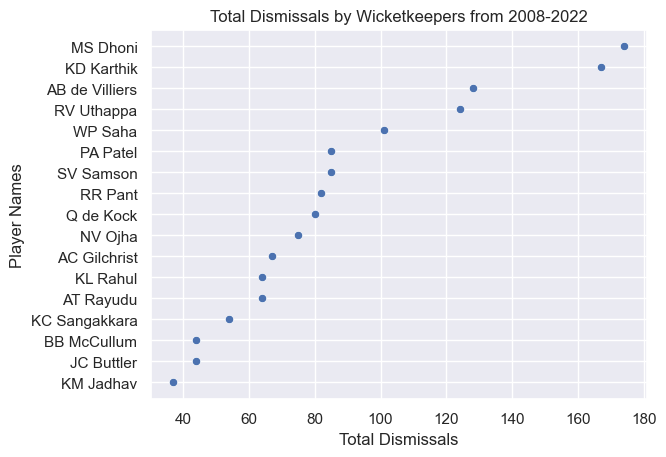

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fws=fws.sort_values('Dismissals', ascending=False)
sns.set_theme(style="darkgrid")
sns.scatterplot(data=fws, x='Dismissals', y='fielders_involved')
plt.title('Total Dismissals by Wicketkeepers from 2008-2022')
plt.xlabel('Total Dismissals')
plt.ylabel('Player Names')


**We clearly see that MS Dhoni and Karthik are separate from the rest with respect to dismissals in the IPL. This paints a picture of their longevity in the sport at the highest level.**

### **#2**
Now, focussing deeper into the batting side of a wicket-keeper, it is essential for us to take into account that every wicket-keeper must be a good batsmen.\
Let's have a look.

In [8]:
fws  = fws[(fws['Innings'] >= 60)]
kps = fws.index.tolist()

btsmn = pd.read_csv('../data/processed/batsman_stats.csv')
btsmn = btsmn[ btsmn['batter'].isin(kps)]

fws = fws.reset_index().sort_values(by = 'fielders_involved')
btsmn= btsmn.reset_index().sort_values(by = 'batter').rename(columns={'batter':'fielders_involved'})

keeper_batsmen = pd.merge(fws, btsmn, on='fielders_involved', how='left')
keeper_batsmen = keeper_batsmen.drop(columns=['index','Matches','Total Runs','Balls Faced', 'Wickets'])
keeper_batsmen

,fielders_involved,Catches,Stumpings,Innings,Dismissals,Dis/Inn,Strike Rate,Runs scored per wicket
0,AB de Villiers,120,8,99,128,1.292929,148.580442,41.448000
1,AT Rayudu,62,2,61,64,1.049180,124.148148,29.507042
2,KD Karthik,133,34,123,167,1.357724,129.267572,26.053571
3,MS Dhoni,135,39,127,174,1.370079,130.931089,35.056338
4,NV Ojha,65,10,60,75,1.250000,114.264706,21.000000
5,PA Patel,69,16,70,85,1.214286,116.625717,22.425197
6,RV Uthappa,92,32,89,124,1.393258,126.152279,26.923913
7,SV Samson,73,12,65,85,1.307692,132.407060,29.630252
8,WP Saha,79,22,68,101,1.485294,124.397745,25.281250


Text(0, 0.5, 'Player Names')

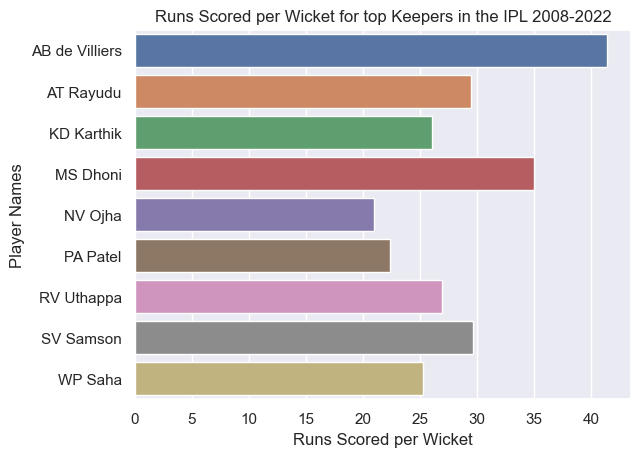

In [9]:
sns.barplot(data=keeper_batsmen, x="Runs scored per wicket", y="fielders_involved")
plt.title('Runs Scored per Wicket for top Keepers in the IPL 2008-2022')
plt.xlabel('Runs Scored per Wicket')
plt.ylabel('Player Names')

Here, it is apparent that AB de villiers has clearly been the most proefficient, followed by Dhoni. 

### **3**

In [10]:
btsmn = pd.read_csv('../data/processed/batsman_stats.csv')
x = btsmn['batter'].unique().tolist()

bwlr = pd.read_csv('../data/processed/bowlerstatssparsh.csv')
bwlr = bwlr[ bwlr['bowler'].isin(x)]

btsmn= btsmn.rename(columns={'batter':'bowler'})
all = pd.merge(bwlr, btsmn, on='bowler', how='left')
#all = all.drop(columns=['index','Matches','Total Runs','Balls Faced', 'Wickets'])
all
#all.to_csv("../data/processed/allRounder_stats.csv")

,bowler,total_run,wickets_taken,extras_given,balls_bowled,overs_bowled,Economy Rate,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket
0,DJ Bravo,4436,207,258,3296,549,8.080146,110,1560,1247,69,125.100241,22.608696
1,SP Narine,3907,171,152,3516,586,6.667235,82,1025,664,64,154.367470,16.015625
2,RA Jadeja,4114,141,123,3262,543,7.576427,157,2502,2049,100,122.108346,25.020000
3,AR Patel,3140,109,97,2599,433,7.251732,87,1135,919,59,123.503808,19.237288
4,SR Watson,2742,107,171,2137,356,7.702247,141,3880,2892,126,134.163209,30.793651
5,IK Pathan,2711,99,142,2113,352,7.701705,82,1150,985,53,116.751269,21.698113


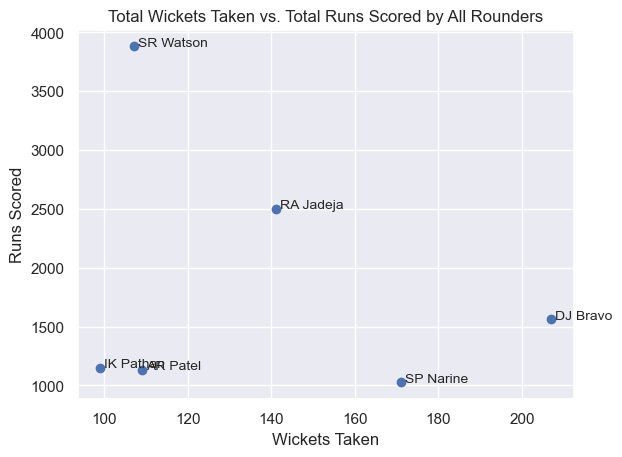

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()
ax.scatter(all['wickets_taken'], all['Total Runs'])

for i, row in all.iterrows():
    x, y = row['wickets_taken'], row['Total Runs']
    ax.text(float(x)+1, float(y)+0.1, row['bowler'], fontsize=10)
    
ax.set_xlabel('Wickets Taken')
ax.set_ylabel('Runs Scored')
ax.set_title('Total Wickets Taken vs. Total Runs Scored by All Rounders')

plt.show()

Here, we see that SR Watson has low wickets but high runs, whereas, DJ Bravo has the opposite. RA Jadeja remains in the middle ground.\
This plot gives us a fair understanging of the attributes of the top all rounders.
Thank you!